In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
x = np.linspace(0,20)
y=-2*x+1


dict={'x0':1,'x1':x , 'y':y}

df=pd.DataFrame(dict)
df = df.sample(frac=1)


col=df.shape[1]
x=np.matrix(df.iloc[:,0:col-1])
y=np.matrix(df.iloc[:,col-1:col])


theta=np.matrix([0.001,0.001])
theta

matrix([[0.001, 0.001]])

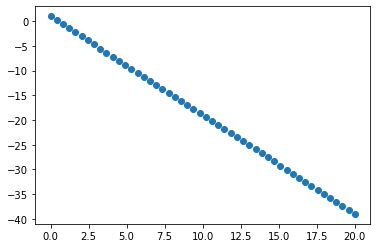

In [3]:
plt.scatter(df.x1,df.y)

In [4]:
def GDCostFunction(xc,yc,thetac):
    error=np.power(np.linalg.norm(((xc @ thetac.T)- yc),ord=2),2)
    mse=error/(2*len(xc))
    return mse

In [5]:
def gradient(X,Y,Theta):
    theta_parameters=int(Theta.ravel().shape[1]) 
    temp = np.matrix(np.zeros(theta.shape))
    for j in range(theta_parameters):
        error = (X*Theta.T) - Y              # (summation(h(xi) - y ) 
        t= np.multiply(error,X[:,j])         # (summation(h(xi) - y ) *xi
        temp[:,j] = 1/len(x) * np.sum(t)
    grad=temp
    return grad

In [6]:
def Adagrad(x,y,v,theta):
    
    if len(v)== 0:
        v.append(np.matrix([0,0]))
        return v

    v.append (v[-1] + np.power(gradient(x,y,theta),2))
    return v[-1]

In [7]:
v=[1,2,3,4,5,6]

In [8]:
v[len(v)-1]

6

In [9]:
np.sqrt(vt[-1])

NameError: name 'vt' is not defined

In [10]:
alpha=0.3
itera=1000

In [11]:
def Batch_Adagrad_GD(X,Y,Theta,lr,iteration):  
    temp = np.matrix(np.zeros(Theta.shape))
    cost = []                   
    theta_parameters=int(Theta.ravel().shape[1])     
    tt0=[]
    tt1=[]
    h=[]
    vt=[]
    eps=0.0000000000001
    for i in range(iteration):
        tt0.append(Theta[0,0])
        tt1.append(Theta[0,1])
        h.append(X*Theta.T)
     
        cost.append( GDCostFunction(X,Y,Theta) )

        vt.append(Adagrad(X,Y,v,Theta))
        vt_sqrt=np.sqrt(vt[-1])
        grad=gradient(X,Y,Theta)

        for j in range(theta_parameters):
        
            temp[:,j] = Theta[:,j] - (( lr* grad[:,j] ) /  ( vt_sqrt[:,j] + eps  ))
            
        Theta=temp
        
    return Theta , cost,tt0,tt1,h,vt

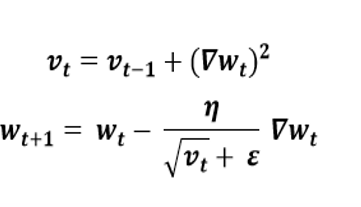

In [12]:
th_op , cost, th0 , th1 , h , vt =Batch_Adagrad_GD(x,y,theta,alpha,itera)

In [13]:
th_op

matrix([[ 0.51733611, -1.96327037]])

In [14]:
y_hat=th_op[0,0] + th_op[0,1]*df.x1

Text(0, 0.5, 'Cost Value')

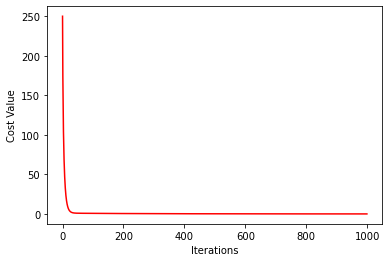

In [15]:
fig,ax = plt.subplots()
ax.plot(np.arange(len(cost)), cost ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'y1- data')

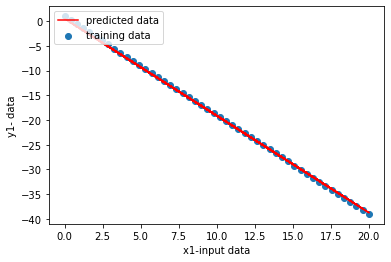

In [384]:
fig ,ax =plt.subplots()
ax.plot(df.x1 , y_hat , 'r', label='predicted data')
ax.scatter(df.x1 , df.y, label='training data')
ax.legend(loc=2)
ax.set_xlabel('x1-input data')
ax.set_ylabel('y1- data')






In [385]:
th0=np.array(th0)
th0=th0.ravel()
th1=np.array(th1)
th1=th1.ravel()

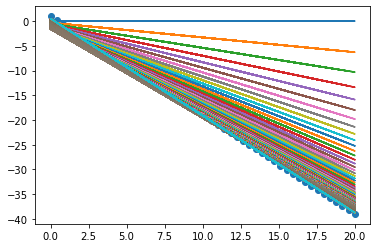

In [386]:
plt.scatter(df.x1,df.y)
for i in  h:
    plt.plot(df.x1,i)

Text(0, 0.5, 'Cost Value')

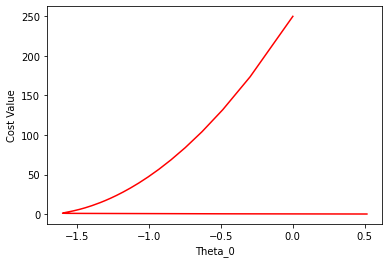

In [387]:
fig,ax = plt.subplots()
ax.plot(th0, cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

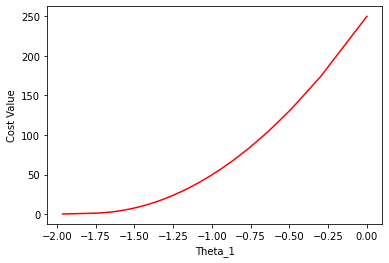

In [388]:
fig,ax = plt.subplots()
ax.plot(th1, cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

In [389]:
r2_score(df.y , y_hat)

0.9995668255771738

# RMS

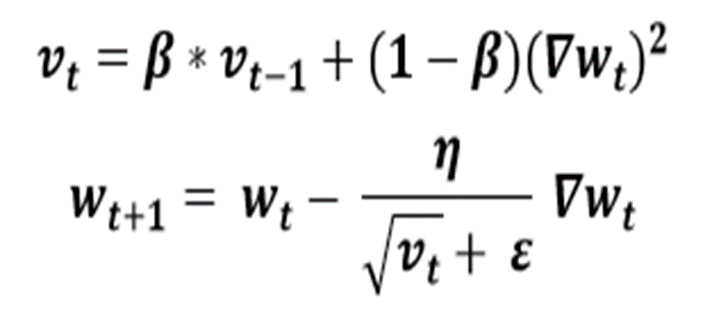

In [390]:
def RMS(x,y,v,theta,gama):
    
    if len(v)== 0:
        v.append(np.matrix([0,0]))
        return v

    v.append (((gama*v[-1]) + ((1-gama)*np.power(gradient(x,y,theta),2))))
    return v[-1]

In [393]:
def Batch_RMS_GD(X,Y,Theta,lr,iteration,gama):  
    temp = np.matrix(np.zeros(Theta.shape))
    cost = []                   
    theta_parameters=int(Theta.ravel().shape[1])     
    tt0=[]
    tt1=[]
    h=[]
    vt=[]
    eps=0.0000000000001
    for i in range(iteration):
        tt0.append(Theta[0,0])
        tt1.append(Theta[0,1])
        h.append(X*Theta.T)
     
        cost.append( GDCostFunction(X,Y,Theta) )

        vt.append(RMS(X,Y,v,Theta,gama))
        vt_sqrt=np.sqrt(vt[-1])
        grad=gradient(X,Y,Theta)

        for j in range(theta_parameters):
        
            temp[:,j] = Theta[:,j] - (( lr* grad[:,j] ) /  ( vt_sqrt[:,j] + eps  ))
            
        Theta=temp
        
    return Theta , cost,tt0,tt1,h,vt

In [406]:
alpha=0.01
itera=1000
gama=0.5

In [407]:
th_op , cost, th0 , th1 , h , vt =Batch_RMS_GD(x,y,theta,alpha,itera,gama)

In [408]:
th_op

matrix([[ 0.99499999, -2.005     ]])

In [409]:
y_hat=th_op[0,0] + th_op[0,1]*df.x1

Text(0, 0.5, 'Cost Value')

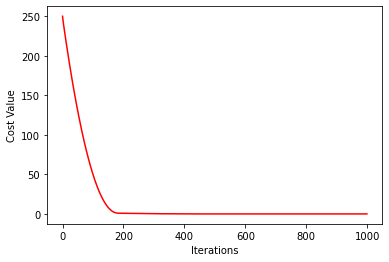

In [410]:
fig,ax = plt.subplots()
ax.plot(np.arange(len(cost)), cost ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'y1- data')

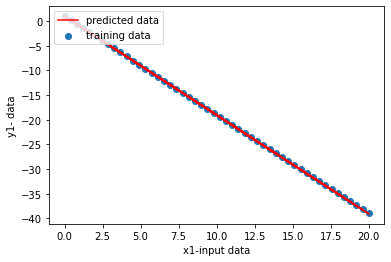

In [411]:
fig ,ax =plt.subplots()
ax.plot(df.x1 , y_hat , 'r', label='predicted data')
ax.scatter(df.x1 , df.y, label='training data')
ax.legend(loc=2)
ax.set_xlabel('x1-input data')
ax.set_ylabel('y1- data')



In [412]:
th0=np.array(th0)
th0=th0.ravel()
th1=np.array(th1)
th1=th1.ravel()

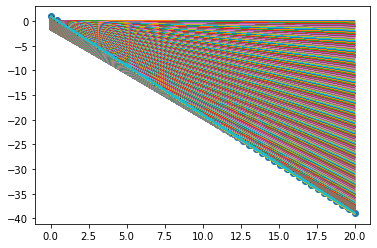

In [413]:
plt.scatter(df.x1,df.y)
for i in  h:
    plt.plot(df.x1,i)

Text(0, 0.5, 'Cost Value')

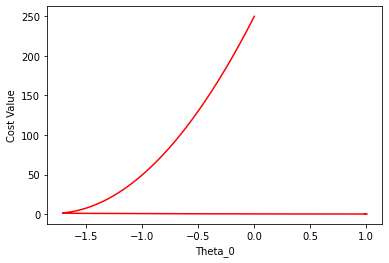

In [414]:
fig,ax = plt.subplots()
ax.plot(th0, cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

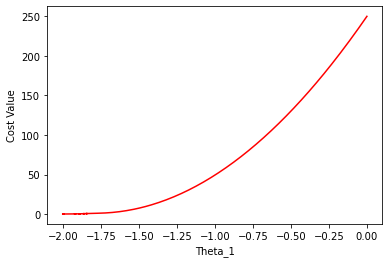

In [415]:
fig,ax = plt.subplots()
ax.plot(th1, cost ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

In [416]:
r2_score(df.y , y_hat)

0.9999719522058824

# Adam

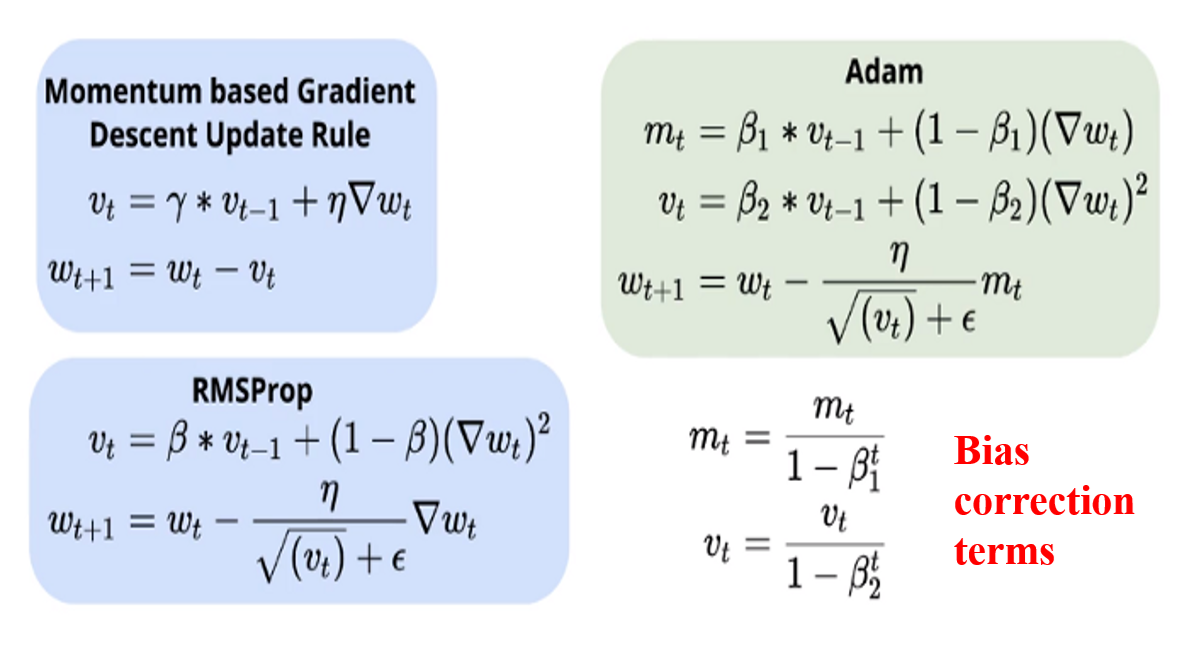

In [436]:
def Adam(x,y,theta,v,m,gama1,gama2):
    if len(m)== 0 & len(v)==0:
        m.append(np.matrix([0,0]))
        v.append(np.matrix([0,0]))
        return v,m

    m.append((gama1 * v[-1]) + ((1-gama1 )* gradient(x,y,theta)))
   
    v.append (((gama2*v[-1]) + ((1-gama2)*np.power(gradient(x,y,theta),2))))
    return v[-1],m[-1]
    

In [478]:
v=[]
m=[]

In [491]:
vt,mt=Adam(x,y,theta,v,m,gama1,gama2)

In [492]:
vt[-1]* (1/(1-gama2))

matrix([[   722.47482388, 134646.82705462]])

In [493]:
mt

matrix([[ 2.22637631, 86.57462776]])

In [494]:
mt[-1]* (1/(1-gama1))

matrix([[ 22.26376309, 865.74627764]])

In [598]:
def Batch_Adam_GD(X,Y,Theta,lr,iteration,gama1,gama2):  
    temp = np.matrix(np.zeros(Theta.shape))
    cost = []                   
    theta_parameters=int(Theta.ravel().shape[1])     
    tt0=[]
    tt1=[]
    h=[]
    vt=[]
    mt=[]
    eps=0.0000000000001
    for i in range(iteration):
        tt0.append(Theta[0,0])
        tt1.append(Theta[0,1])
        h.append(X*Theta.T)
     
        cost.append( GDCostFunction(X,Y,Theta) )

        v,m=Adam(X,Y,Theta,vt,mt,gama1,gama2)
        vt.append(v[-1]* (1/(1-gama2)))
        mt.append(m[-1]* (1/(1-gama1)))
    
        for j in range(theta_parameters):
                  
                temp[:,j] = Theta[:,j] - (  (lr * mt[-1][:,j])/ (np.sqrt(vt[-1][:,j])  +eps  ))
        
        Theta=temp
        
    return Theta, cost,tt0,tt1,h

In [621]:
alpha=0.001
gama1=0.1
gama2=0.3
itera=100

In [622]:
th_op , cost, th0 , th1 , h  =Batch_Adam_GD(x,y,theta,alpha,itera,gama1,gama2)

In [623]:
th_op

matrix([[-0.18994834, -1.7051774 ]])

In [624]:
y_hat=th_op[0,0] + th_op[0,1]*df.x1

Text(0, 0.5, 'Cost Value')

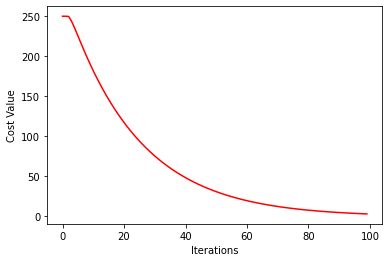

In [625]:
fig,ax = plt.subplots()
ax.plot(np.arange(len(cost)), cost ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'y1- data')

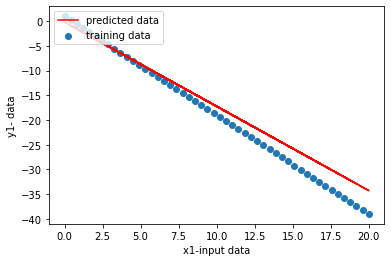

In [626]:
fig ,ax =plt.subplots()
ax.plot(df.x1 , y_hat , 'r', label='predicted data')
ax.scatter(df.x1 , df.y, label='training data')
ax.legend(loc=2)
ax.set_xlabel('x1-input data')
ax.set_ylabel('y1- data')



In [627]:
th0=np.array(th0)
th0=th0.ravel()
th1=np.array(th1)
th1=th1.ravel()

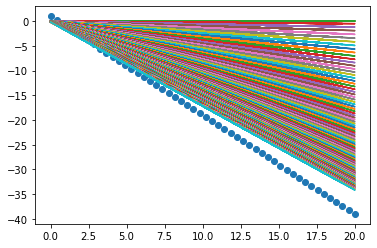

In [628]:
plt.scatter(df.x1,df.y)
for i in  h:
    plt.plot(df.x1,i)

Text(0, 0.5, 'Cost Value')

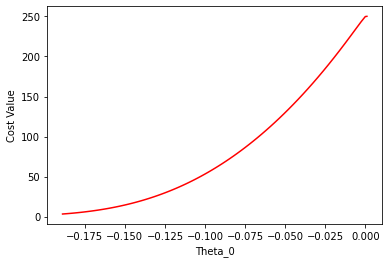

In [629]:
fig,ax = plt.subplots()
ax.plot(th0, cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

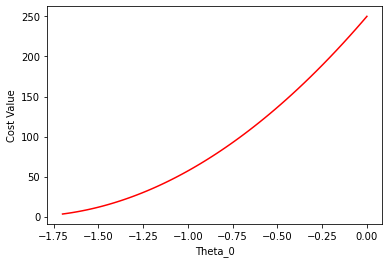

In [630]:
fig,ax = plt.subplots()
ax.plot(th1, cost ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

In [620]:
r2_score(df.y , y_hat)

0.9994518143486869